In [4]:
!ls

County                 Precinct               State_Cleaned.json
County_Cleaned.json    RI_Geographic.ipynb    parser.ipynb
Parsed_RI_Precinct.csv State


In [5]:
import geopandas as gpd
import pandas as pd

In [42]:
stateDF = gpd.read_file("State/RI_State_Converted.GeoJSON")
countyDF = gpd.read_file("County/RI_County.json")
precinctDF = gpd.read_file("Precinct/RI_Precinct.json")

In [43]:
stateDF.head()

,LAND,geometry
0,Y,"POLYGON ((-71.53173 41.37920, -71.53177 41.379..."
1,N,"POLYGON ((-71.52526 41.38229, -71.52519 41.382..."
2,Y,"POLYGON ((-71.29308 41.71354, -71.29307 41.713..."
3,N,"POLYGON ((-71.76970 41.33260, -71.76974 41.332..."
4,N,"POLYGON ((-71.72929 41.33300, -71.72931 41.333..."


In [44]:
countyDF.head()

,OBJECTID,COUNTY,LAND,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,geometry
0,122,NEWPORT,Y,0.000852,5.000704e-08,5.000704e-08,0.000852,"POLYGON ((-71.32251 41.45896, -71.32259 41.458..."
1,123,NEWPORT,Y,0.001081,7.367410e-08,7.367410e-08,0.001081,"POLYGON ((-71.30262 41.45879, -71.30268 41.458..."
2,124,NEWPORT,Y,0.000473,1.449307e-08,1.449307e-08,0.000473,"POLYGON ((-71.18504 41.45897, -71.18511 41.458..."
3,125,NEWPORT,Y,0.001259,9.066567e-08,9.066567e-08,0.001259,"POLYGON ((-71.18538 41.45909, -71.18544 41.459..."
4,126,NEWPORT,Y,0.002188,2.534847e-07,2.534847e-07,0.002188,"POLYGON ((-71.30032 41.45967, -71.30026 41.459..."


In [45]:
precinctDF.head()

,OBJECTID,NAME,Shape__Are,Shape__Len,geometry
0,1,0102,0.000348,0.153037,"MULTIPOLYGON (((-71.34122 41.73016, -71.34123 ..."
1,2,0101,0.000426,0.107569,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."
2,3,0104,0.000509,0.338228,"MULTIPOLYGON (((-71.30425 41.74515, -71.30425 ..."
3,4,0105,0.000520,0.297727,"MULTIPOLYGON (((-71.29308 41.71355, -71.29307 ..."
4,5,0103,0.000584,0.158078,"POLYGON ((-71.31979 41.73751, -71.31897 41.737..."


In [46]:
countyDF.drop(["OBJECTID", "LAND", "Shape_Leng", "Shape_Area", "Shape__Are", "Shape__Len"], axis=1, inplace=True)

In [47]:
countyDF.head(1)

,COUNTY,geometry
0,NEWPORT,"POLYGON ((-71.32251 41.45896, -71.32259 41.458..."


In [48]:
countyDF.rename({"COUNTY":"County"}, axis=1, inplace=True)

In [49]:
def lower_capitalize(string):
    splited = string.split(" ")
    for i in range(len(splited)):
        splited[i] = splited[i].lower().capitalize()
        
    return ' '.join(splited)

In [50]:
for index, row in countyDF.iterrows():
    county = lower_capitalize(row["County"])
    countyDF.at[index, "County"] = county
countyDF.head()

,County,geometry
0,Newport,"POLYGON ((-71.32251 41.45896, -71.32259 41.458..."
1,Newport,"POLYGON ((-71.30262 41.45879, -71.30268 41.458..."
2,Newport,"POLYGON ((-71.18504 41.45897, -71.18511 41.458..."
3,Newport,"POLYGON ((-71.18538 41.45909, -71.18544 41.459..."
4,Newport,"POLYGON ((-71.30032 41.45967, -71.30026 41.459..."


In [51]:
countyDF.to_file("County_Cleaned.GeoJSON", driver="GeoJSON")

In [6]:
stateDF.head()

In [53]:
stateDF.drop(["LAND"], axis=1, inplace=True)
stateDF.to_file("State_Cleaned.GeoJSON", driver="GeoJSON")

In [54]:
precinctDF.head()

,OBJECTID,NAME,Shape__Are,Shape__Len,geometry
0,1,0102,0.000348,0.153037,"MULTIPOLYGON (((-71.34122 41.73016, -71.34123 ..."
1,2,0101,0.000426,0.107569,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."
2,3,0104,0.000509,0.338228,"MULTIPOLYGON (((-71.30425 41.74515, -71.30425 ..."
3,4,0105,0.000520,0.297727,"MULTIPOLYGON (((-71.29308 41.71355, -71.29307 ..."
4,5,0103,0.000584,0.158078,"POLYGON ((-71.31979 41.73751, -71.31897 41.737..."


In [55]:
precinctDF.drop(["OBJECTID", "Shape__Are", "Shape__Len"], inplace=True, axis=1)
precinctDF.rename({"NAME":"Precinct #"}, inplace=True, axis=1)

# merge precinct and voting

In [7]:
presidentialVoting = pd.read_csv("../voting/presidential 2016/2016PresidentialRI_Cleaned.csv")

In [8]:
presidentialVoting.head()

,Unnamed: 0,County,Precinct Name,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
0,0,Bristol County,Barrington 0101,101,1027,522,60,23,2,1634
1,1,Bristol County,Barrington 0102,102,1331,683,68,21,3,2106
2,2,Bristol County,Barrington 0103,103,1136,469,59,17,0,1681
3,3,Bristol County,Barrington 0104,104,1328,611,78,25,2,2044
4,4,Bristol County,Barrington 0105,105,1290,590,69,24,4,1977


In [9]:
presidentialVoting.drop(["Unnamed: 0"], inplace=True, axis=1)

In [10]:
# turn all precinct # into 4 letter string
presidentialVoting = presidentialVoting.astype({"Precinct #":"str"})

for index, row in presidentialVoting.iterrows():
    cur = str(row["Precinct #"])
    if len(cur) == 3:
        presidentialVoting.at[index, "Precinct #"] = "0" + cur

# now start mapping voting and geographic data

In [11]:
presidentialVoting.head(1)

,County,Precinct Name,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
0,Bristol County,Barrington 0101,0101,1027,522,60,23,2,1634


In [13]:
precinctDF = gpd.read_file("Precinct/RI_Precinct_Cleaned.json")
precinctDF.head()

,Precinct #,geometry
0,0101,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."
1,0102,"MULTIPOLYGON (((-71.35581 41.74533, -71.35560 ..."
2,0103,"POLYGON ((-71.31979 41.73751, -71.31897 41.737..."
3,0104,"MULTIPOLYGON (((-71.30677 41.74204, -71.30682 ..."
4,0105,"MULTIPOLYGON (((-71.31354 41.72381, -71.31370 ..."


In [14]:
# sort both df by precinct #
precinctDF.sort_values(by=["Precinct #"], inplace=True)
presidentialVoting.sort_values(by=["Precinct #"], inplace=True)

In [15]:
mergedPrecincts = precinctDF.merge(presidentialVoting, left_on='Precinct #', right_on='Precinct #')

In [16]:
mergedPrecincts.head()

,Precinct #,geometry,County,Precinct Name,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
0,0101,"POLYGON ((-71.32270 41.77270, -71.32270 41.772...",Bristol County,Barrington 0101,1027,522,60,23,2,1634
1,0102,"MULTIPOLYGON (((-71.35581 41.74533, -71.35560 ...",Bristol County,Barrington 0102,1331,683,68,21,3,2106
2,0103,"POLYGON ((-71.31979 41.73751, -71.31897 41.737...",Bristol County,Barrington 0103,1136,469,59,17,0,1681
3,0104,"MULTIPOLYGON (((-71.30677 41.74204, -71.30682 ...",Bristol County,Barrington 0104,1328,611,78,25,2,2044
4,0105,"MULTIPOLYGON (((-71.31354 41.72381, -71.31370 ...",Bristol County,Barrington 0105,1290,590,69,24,4,1977


In [17]:
mergedPrecincts.to_file("../RI_Precincts_Merged.json", driver='GeoJSON')

In [18]:
print(len(presidentialVoting), len(precinctDF), len(mergedPrecincts))

419 419 419


In [20]:
merge = gpd.read_file("../RI_Precincts_Merged.json")

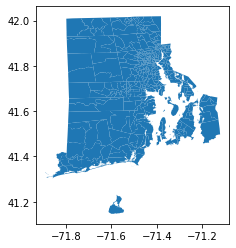

In [21]:
merge.plot()

In [22]:
merge.head()

,Precinct #,County,Precinct Name,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,geometry
0,0101,Bristol County,Barrington 0101,1027,522,60,23,2,1634,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."
1,0102,Bristol County,Barrington 0102,1331,683,68,21,3,2106,"MULTIPOLYGON (((-71.35581 41.74533, -71.35560 ..."
2,0103,Bristol County,Barrington 0103,1136,469,59,17,0,1681,"POLYGON ((-71.31979 41.73751, -71.31897 41.737..."
3,0104,Bristol County,Barrington 0104,1328,611,78,25,2,2044,"MULTIPOLYGON (((-71.30677 41.74204, -71.30682 ..."
4,0105,Bristol County,Barrington 0105,1290,590,69,24,4,1977,"MULTIPOLYGON (((-71.31354 41.72381, -71.31370 ..."


In [3]:
RI_State = gpd.read_file("State_Cleaned.GeoJSON")
RI_State.head()

,geometry
0,"POLYGON ((-71.53173 41.37920, -71.53177 41.379..."
1,"POLYGON ((-71.52526 41.38229, -71.52519 41.382..."
2,"POLYGON ((-71.29308 41.71354, -71.29307 41.713..."
3,"POLYGON ((-71.76970 41.33260, -71.76974 41.332..."
4,"POLYGON ((-71.72929 41.33300, -71.72931 41.333..."


In [ ]:
RI_State["Index"] = ""
i = 0
for index, row in RI_State.iterrows():
    RI_State.at[index, "Index"] = i
    i += 1

In [ ]:
RI_State.to_file("State_Cleaned.GeoJSON", driver="GeoJSON")

In [2]:
countyDF = gpd.read_file("County_Cleaned.GeoJSON")
countyDF.head()

,County,geometry
0,Newport,"POLYGON ((-71.32251 41.45896, -71.32259 41.458..."
1,Newport,"POLYGON ((-71.30262 41.45879, -71.30268 41.458..."
2,Newport,"POLYGON ((-71.18504 41.45897, -71.18511 41.458..."
3,Newport,"POLYGON ((-71.18538 41.45909, -71.18544 41.459..."
4,Newport,"POLYGON ((-71.30032 41.45967, -71.30026 41.459..."


In [3]:
countyDF["Index"] = ""
i = 0
for index, row in countyDF.iterrows():
    countyDF.at[index, "Index"] = i
    i += 1

In [4]:
countyDF.head()

,County,geometry,Index
0,Newport,"POLYGON ((-71.32251 41.45896, -71.32259 41.458...",0
1,Newport,"POLYGON ((-71.30262 41.45879, -71.30268 41.458...",1
2,Newport,"POLYGON ((-71.18504 41.45897, -71.18511 41.458...",2
3,Newport,"POLYGON ((-71.18538 41.45909, -71.18544 41.459...",3
4,Newport,"POLYGON ((-71.30032 41.45967, -71.30026 41.459...",4


In [5]:
countyDF.to_file("County_Cleaned.GeoJSON", driver="GeoJSON")